In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import numpy as np
from tqdm import tqdm
import pandas as pd

In [13]:
browser = webdriver.Chrome()
browser.get("https://chromewebstore.google.com/detail/honey-automatic-coupons-r/bmnlcjabgnpnenekpadlanbbkooimhnj/reviews")

In [29]:
for i in range(10000):
    button = browser.find_element(By.XPATH,'//*[@id="yDmH0d"]/c-wiz/div/div/main/div[1]/div/div/button')
    button.click()
    time.sleep(2+np.random.randint(100,999)/1000)
    with open("honeycomment.html","w",encoding="utf-8") as file:
        content = browser.page_source
        file.write(content)
    if i%100 == 0:
        with open(f"honeycomment_{i}.html","w",encoding="utf-8") as file:
            content = browser.page_source
            file.write(content)        

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="yDmH0d"]/c-wiz/div/div/main/div[1]/div/div/button"}
  (Session info: chrome=122.0.6261.129); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6BC83AD02+56930]
	(No symbol) [0x00007FF6BC7AF602]
	(No symbol) [0x00007FF6BC6642E5]
	(No symbol) [0x00007FF6BC6A98ED]
	(No symbol) [0x00007FF6BC6A9A2C]
	(No symbol) [0x00007FF6BC6EA967]
	(No symbol) [0x00007FF6BC6CBCDF]
	(No symbol) [0x00007FF6BC6E81E2]
	(No symbol) [0x00007FF6BC6CBA43]
	(No symbol) [0x00007FF6BC69D438]
	(No symbol) [0x00007FF6BC69E4D1]
	GetHandleVerifier [0x00007FF6BCBB6F8D+3711213]
	GetHandleVerifier [0x00007FF6BCC104CD+4077101]
	GetHandleVerifier [0x00007FF6BCC0865F+4044735]
	GetHandleVerifier [0x00007FF6BC8D9736+706710]
	(No symbol) [0x00007FF6BC7BB8DF]
	(No symbol) [0x00007FF6BC7B6AC4]
	(No symbol) [0x00007FF6BC7B6C1C]
	(No symbol) [0x00007FF6BC7A68D4]
	BaseThreadInitThunk [0x00007FFADB66257D+29]
	RtlUserThreadStart [0x00007FFADD18AA58+40]


In [84]:
content = browser.page_source
content = BeautifulSoup(content)

In [86]:
len(content.find_all("section",attrs={"class":"T7rvce"}))

6668

In [31]:
with open("honeycomment_2900.html","r",encoding="utf-8") as file:
    response = file.read()
response = BeautifulSoup(response)

results = []
length = len(response.find_all("section",attrs={"class":"T7rvce"}))
response_list = response.find_all("section",attrs={"class":"T7rvce"})
for i in tqdm(range(length)):
    rate = response_list[i].find("div",attrs={"class":"B1UG8d"}).attrs["title"]
    user = response_list[i].find("span").text
    comment = response_list[i].find("p").text
    comment_time = response_list[i].find("span",attrs={"class":"ydlbEf"}).text
    result = {"rate":rate, "user":user, "comment":comment, "comment_time":comment_time}
    results.append(result)

comment_output = pd.DataFrame(results)
comment_output["comment_time"] = pd.to_datetime(comment_output["comment_time"],format="%Y年%m月%d日")

100%|█████████████████████████████████████████████████████████████████████████| 29020/29020 [00:01<00:00, 16703.18it/s]


In [36]:
comment_output[comment_output["comment_time"]>"2023-12-15"]

,rate,user,comment,comment_time
0,5 星,Sayf Adwan,literally the best,2024-03-24
1,5 星,SbastianMunoz,"Excelente extension, funciona genial",2024-03-24
2,3 星,Mitchell,"It works for the most part, but it is insanely...",2024-03-23
3,5 星,Yad Wiso,It is amazing. It always works for me. But the...,2024-03-23
4,1 星,Mike Leslie,Can't get any of the rewards ever. It will not...,2024-03-23
...,...,...,...,...
212,1 星,Connor Johnson,Annoying pop ups EVERYTIME I try to quickly lo...,2023-12-17
213,5 星,Madeleine Kuras,Great for finding discounts and receiving vouc...,2023-12-16
214,5 星,Hasan Yavuz,veryyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,2023-12-16
215,5 星,- “‪Minto‬” -,seems to work pretty good,2023-12-16


<Axes: xlabel='comment_time'>

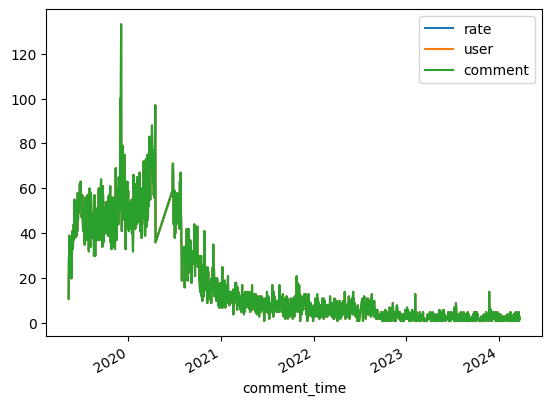

In [34]:
comment_output.groupby(by="comment_time").count().plot()

In [29]:
len(response.find_all("section",attrs={"class":"T7rvce"})[0].find_all())

38

In [17]:
pd.to_datetime(comment_output["comment_time"],format="%Y年%m月%d日")

0       2024-03-24
1       2024-03-24
2       2024-03-23
3       2024-03-23
4       2024-03-23
           ...    
14485   2020-03-04
14486   2020-03-04
14487   2020-03-04
14488   2020-03-04
14489   2020-03-04
Name: comment_time, Length: 14490, dtype: datetime64[ns]

In [66]:
cookies

[{'domain': '.moz.com',
  'expiry': 1743781999,
  'httpOnly': False,
  'name': 'OptanonConsent',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': 'isGpcEnabled=0&datestamp=Thu+Apr+04+2024+23%3A53%3A19+GMT%2B0800+(%E4%B8%AD%E5%9B%BD%E6%A0%87%E5%87%86%E6%97%B6%E9%97%B4)&version=202403.1.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=3b3f40f5-1de1-4750-9b5b-a62646782b23&interactionCount=1&isAnonUser=1&landingPath=NotLandingPage&GPPCookiesCount=1&groups=C0001%3A1%2CC0002%3A1%2CC0003%3A1%2COSSTA_BG%3A1%2CC0004%3A1%2CC0005%3A1&genVendors=&AwaitingReconsent=false'},
 {'domain': '.moz.com',
  'expiry': 1745941998,
  'httpOnly': False,
  'name': '_uetvid',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': '22332bb0f29b11ee99775347ee8480e5'},
 {'domain': '.moz.com',
  'expiry': 1746805998,
  'httpOnly': False,
  'name': '_ga',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': 'GA1.1.819363849.1712245860'},
 {'domain': '.moz.com',
  'expiry'

In [74]:
post_cookie = ""
for cookie in cookies:
    post_cookie+=cookie["name"]
    post_cookie+="="
    post_cookie+=cookie["value"]
    post_cookie+=";"

In [71]:
post_cookie

'OptanonConsent:isGpcEnabled=0&datestamp=Thu+Apr+04+2024+23%3A53%3A19+GMT%2B0800+(%E4%B8%AD%E5%9B%BD%E6%A0%87%E5%87%86%E6%97%B6%E9%97%B4)&version=202403.1.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=3b3f40f5-1de1-4750-9b5b-a62646782b23&interactionCount=1&isAnonUser=1&landingPath=NotLandingPage&GPPCookiesCount=1&groups=C0001%3A1%2CC0002%3A1%2CC0003%3A1%2COSSTA_BG%3A1%2CC0004%3A1%2CC0005%3A1&genVendors=&AwaitingReconsent=false;_uetvid:22332bb0f29b11ee99775347ee8480e5;_ga:GA1.1.819363849.1712245860;_ga_DS7K9Q3S5W:GS1.1.1712245860.1.1.1712245998.0.0.0;__stripe_mid:b7efb04e-bbd7-4cc5-afd1-c28d7e8984316b517a;_gat_UA-1870679-27:1;_gat_UA-1870679-33:1;_ga_LGQZKGRBE5:GS1.1.1712245860.1.1.1712245997.60.0.0;_rdt_uuid:1712245884948.9b826995-7805-4a23-afaa-7d0a76c1d3a6;__hssc:181959355.3.1712245861475;_gat:1;ajs_user_id:13836265;_ga_QLCPR2NDVP:GS1.1.1712245860.1.0.1712245883.0.0.0;hubspotutk:5edbff8c77cf4c5d746629cc76f4ec0c;mozauth:hT57PwErBvcwWZFkuiniegzGaEZndOS6vMZI7v5dOPakizc2xl73ar7rj

In [85]:
import http.client
import json

conn = http.client.HTTPSConnection("app.moz.com")
payload = json.dumps({
   "id": "b76f12fe-5e86-4921-962f-6b10bc28779e",
   "jsonrpc": "2.0",
   "method": "domain.overview.fetch",
   "params": {
      "data": {
         "target": {
            "query": "couponbirds.com",
            "scope": "domain",
            "locale": "en-US"
         }
      }
   }
})
headers = {
   'User-Agent': 'Apifox/1.0.0 (https://apifox.com)',
   'Content-Type': 'application/json',
   'Accept': '*/*',
   'Host': 'app.moz.com',
   'Connection': 'keep-alive',
   'Cookie': f'{post_cookie}'
}
conn.request("POST", "/app-api/jsonrpc", payload, headers)
res = conn.getresponse()
data = res.read()
print(data.decode("utf-8"))

{"id":"b76f12fe-5e86-4921-962f-6b10bc28779e","jsonrpc":"2.0","result":{"quota":{"path":"search.limits.research.domain_overview","account_id":15846587,"allotted":100,"used":18,"reset":"month","report":"day","overage":false,"period_start":1711954800,"period_reset":1714546800,"usage_key":"{\"target\":{\"query\":\"https://couponbirds.com\",\"scope\":\"domain\",\"locale\":\"en-US\"},\"competitors\":[]}","usage_value":1,"usage_action":"app"},"target":{"query":"couponbirds.com","scope":"domain","locale":"en-US","parsed_query":"https://couponbirds.com","suggestion":null},"competitors":[],"async_calls":{"DomainOverviewUrlMetricsSummaryFetch":{"id":"1efd8dee-060b-4803-9200-c7ac8666928c","action":"DomainOverviewUrlMetricsSummaryFetch","status":"pending","ttl":120,"result":"null","error":"null"},"DomainOverviewBrandAuthorityFetch":{"id":"0616ac07-bf47-4d1a-9749-cd8f25ec7b19","created_at":1712250998625,"action":"DomainOverviewBrandAuthorityFetch","status":"complete","payload":"{\"auth\":{\"session_

In [93]:
import http.client
import json

conn = http.client.HTTPSConnection("app.moz.com")
payload = json.dumps({"id":"b76f12fe-5e86-4921-962f-6b10bc28779e",
                      "jsonrpc":"2.0","method":"async.call.lookup",
                      "params":
                      {"data":
                       {"id":"28c3ff2b-32da-4ca0-8d95-182f15bac063"}}})
headers = {
   'User-Agent': 'Apifox/1.0.0 (https://apifox.com)',
   'Content-Type': 'application/json',
   'Accept': '*/*',
   'Host': 'app.moz.com',
   'Connection': 'keep-alive',
   'Cookie': f'{post_cookie}'
}
conn.request("POST", "/app-api/jsonrpc", payload, headers)
res = conn.getresponse()
data = res.read()
print(data.decode("utf-8"))

{"id":"b76f12fe-5e86-4921-962f-6b10bc28779e","jsonrpc":"2.0","error":{"code":-32655,"status":404,"data":{},"message":"Call was not found."}}
